# Generate point outliers in time series

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from badgers.generators.time_series.outliers import LocalZScoreGenerator, RandomZerosGenerator

## Setup random generator

In [2]:
from numpy.random import default_rng
seed = 0
rng = default_rng(seed)

## Import data (using sktime)

In [3]:
from sktime.datasets import load_airline

In [4]:
X = load_airline()
t = X.index.to_timestamp()

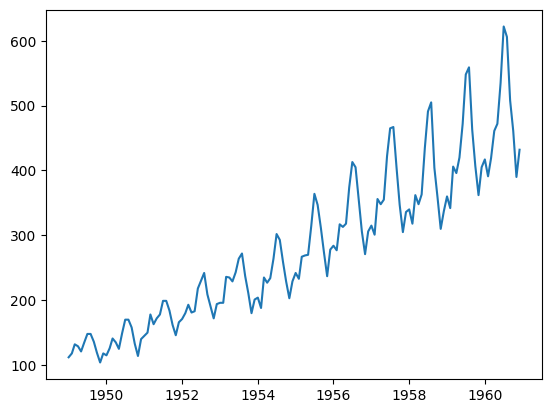

In [5]:
plt.plot(t, X.values)

## Randomly change values to zero

In [6]:
generator = RandomZerosGenerator(random_generator=rng)

In [7]:
Xt, _ = generator.generate(X.copy(), y=None, n_outliers=10)

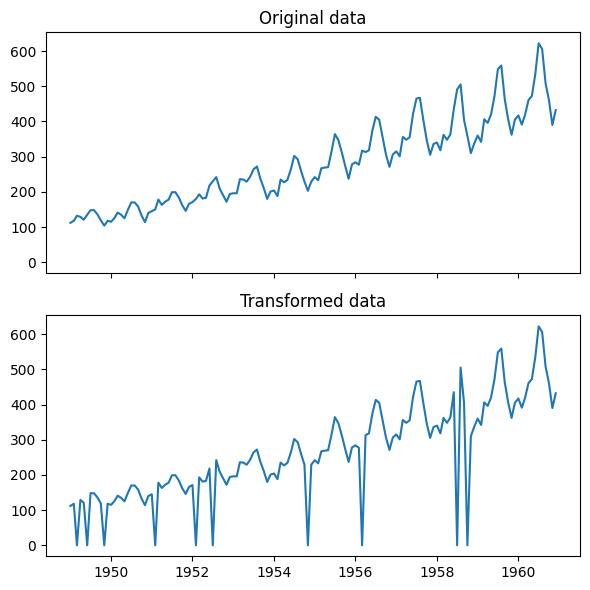

In [8]:
fig, axes = plt.subplots(2, sharex=True, sharey=True, figsize=(6,6))
axes[0].plot(t, X.values)
axes[0].set_title('Original data')
axes[1].plot(t, Xt)
axes[1].set_title('Transformed data')
plt.tight_layout();

## Generate local extreme values (1 Dimension)

In [9]:
generator = LocalZScoreGenerator(random_generator=rng)

In [10]:
Xt, _ = generator.generate(X.copy(), y=None, n_outliers=10,)

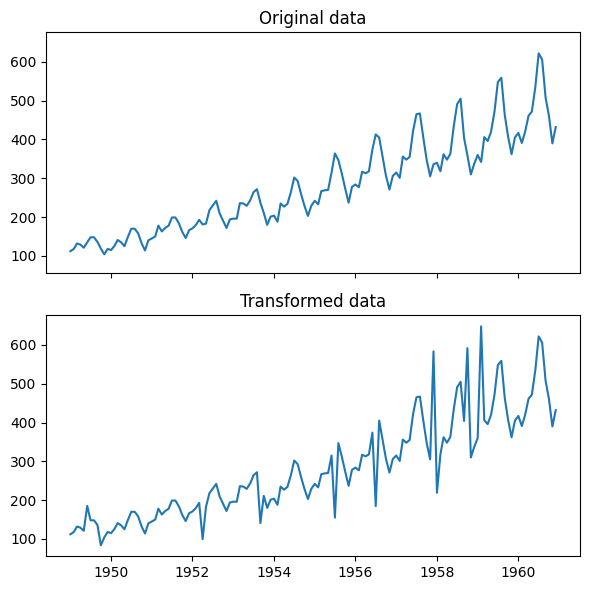

In [11]:
fig, axes = plt.subplots(2, sharex=True, sharey=True, figsize=(6,6))
axes[0].plot(t, X.values)
axes[0].set_title('Original data')
axes[1].plot(t, Xt)
axes[1].set_title('Transformed data')
plt.tight_layout();

## Generate local extreme values (2 Dimensions and more)

In [12]:
X = np.random.normal(loc=(2,0), scale=(0.5, 0.1), size=(100,2))

In [13]:
Xt, _ = generator.generate(X.copy(), y=None, n_outliers=25)

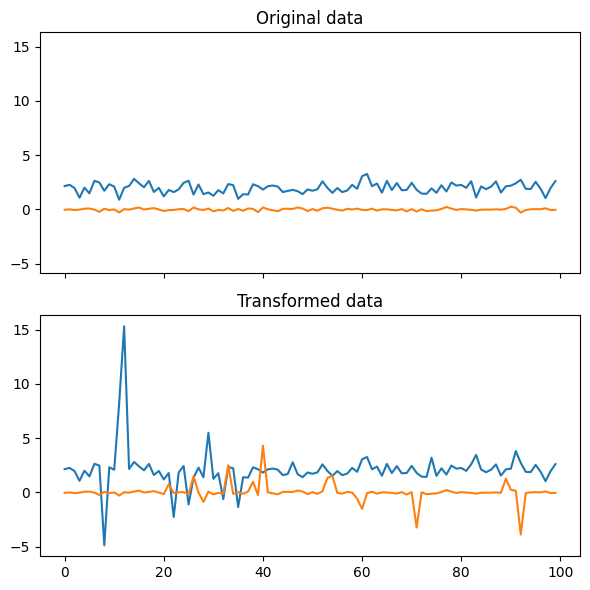

In [14]:
fig, axes = plt.subplots(2, sharex=True, sharey=True, figsize=(6,6))
axes[0].plot(X)
axes[0].set_title('Original data')
axes[1].plot(Xt)
axes[1].set_title('Transformed data')
plt.tight_layout();